# Pollution dataset practise

In [25]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df=pd.read_csv('C:/Users/RIDHIM/Downloads/pollution.csv')
df.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh


In [27]:
df.dtypes

City     object
NO2      object
PM10     object
SO2      object
State    object
dtype: object

## a useful application now, to convert Null to NaN(actual null which is useful)

In [28]:
## here we see that we have the PM10 value as Null in thisr row.
df.loc[28,:] 

City        Bilaspur
NO2               19
PM10            Null
SO2                8
State    Chattisgarh
Name: 28, dtype: object

In [29]:
## so we set that Null to NaN so that we can perform/drop such rows easily later on
df.loc[28,'PM10']= np.nan

In [30]:
## we see that the PM10 values gets converted to NaN(useful null)
df.loc[28,:]

City        Bilaspur
NO2               19
PM10             NaN
SO2                8
State    Chattisgarh
Name: 28, dtype: object

In [31]:
df.loc[[168,169,170,171],['NO2','SO2']]=np.nan
df.loc[168,:]

City        Haldwani
NO2              NaN
PM10             196
SO2              NaN
State    Uttarakhand
Name: 168, dtype: object

In [32]:
df.loc[df['SO2']=='Null',:]
##converting this Null to NaN as well

,City,NO2,PM10,SO2,State
116,Byrnihat,15,175,Null,Meghalaya


In [33]:
df.loc[116,['SO2']]=np.nan

In [34]:
df.loc[116,:]

City      Byrnihat
NO2             15
PM10           175
SO2            NaN
State    Meghalaya
Name: 116, dtype: object

In [35]:
df.loc[df['NO2']=='Null',:]

## no such values left

,City,NO2,PM10,SO2,State


In [36]:
df.loc[df['PM10']=='Null',:]

##no succh values left

,City,NO2,PM10,SO2,State


## dropping all the rows with null values in any of the columns.

In [40]:
df.dropna(how='any',axis=0,inplace=True)

## dropping all such rows

In [41]:
df.shape

##new dataframe shape.

(175, 5)

## converting the numerical columns datatype to numeric

In [43]:
df[['NO2','SO2','PM10']] = df[['NO2','SO2','PM10']].apply(pd.to_numeric)

In [44]:
df.dtypes

City     object
NO2       int64
PM10      int64
SO2       int64
State    object
dtype: object

In [45]:
df[['NO2','SO2','PM10']].max()

##finding max values in these categories.

NO2      75
SO2      60
PM10    308
dtype: int64

## plotting pollution values(NO2 AND SO2) for all the states USING A barplot.

C:\Users\RIDHIM\AppData\Local\Temp/ipykernel_19252/3274385905.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation='vertical', size=8,color='b')


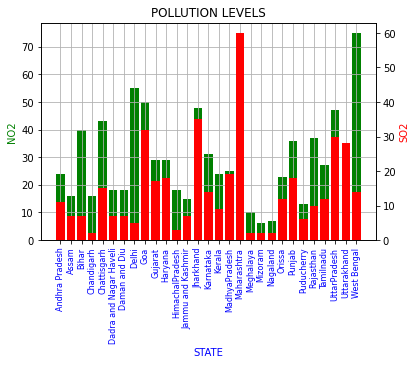

In [69]:
fig, ax1 = plt.subplots()

x = df['State'].unique()

ax2 = ax1.twinx()
ax1.bar(df['State'],df['NO2'], color='g')
ax2.bar(df['State'],df['SO2'], color='r')

ax1.set_xlabel('STATE',color='b')
ax1.set_ylabel('NO2', color='g')
ax2.set_ylabel('SO2', color='r')
ax1.set_xticklabels(x,rotation='vertical', size=8,color='b')
ax1.set_title('POLLUTION LEVELS')
ax1.grid()


## now we will plot all the State -- pollution values in an uptrend/increasing manner 

In [117]:
a = df.groupby('State').sum().sort_values('NO2')
a['STATE'] = a.index
a


,NO2,PM10,SO2,STATE
State,,,,
Mizoram,6,42,2,Mizoram
Nagaland,12,142,4,Nagaland
Puducherry,13,38,6,Puducherry
Jammu and Kashmir,15,115,7,Jammu and Kashmir
Chandigarh,16,92,2,Chandigarh
Dadra and Nagar Haveli,18,39,7,Dadra and Nagar Haveli
Daman and Diu,18,35,7,Daman and Diu
Meghalaya,25,213,6,Meghalaya
Uttarakhand,30,162,28,Uttarakhand


In [119]:
b = df.groupby('State').sum().sort_values('SO2')
b['STATE'] = b.index
b


,NO2,PM10,SO2,STATE
State,,,,
Mizoram,6,42,2,Mizoram
Chandigarh,16,92,2,Chandigarh
Nagaland,12,142,4,Nagaland
Delhi,55,261,5,Delhi
Puducherry,13,38,6,Puducherry
Meghalaya,25,213,6,Meghalaya
Daman and Diu,18,35,7,Daman and Diu
Bihar,40,181,7,Bihar
Jammu and Kashmir,15,115,7,Jammu and Kashmir


In [120]:
c = df.groupby('State').sum().sort_values('PM10')
c['STATE'] = c.index
c


,NO2,PM10,SO2,STATE
State,,,,
Daman and Diu,18,35,7,Daman and Diu
Puducherry,13,38,6,Puducherry
Dadra and Nagar Haveli,18,39,7,Dadra and Nagar Haveli
Mizoram,6,42,2,Mizoram
Chandigarh,16,92,2,Chandigarh
Jammu and Kashmir,15,115,7,Jammu and Kashmir
Nagaland,12,142,4,Nagaland
Uttarakhand,30,162,28,Uttarakhand
Bihar,40,181,7,Bihar


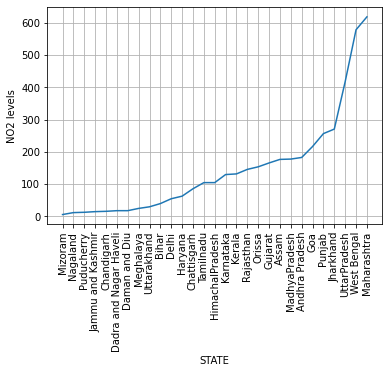

In [121]:
x = a['STATE']
damn = df.groupby('State').sum().sort_values('NO2')['NO2']



plt.plot(x,damn) ## grouping and using the count functionality then.
## for grid for bettter reaibility
plt.xticks(x,rotation='vertical')
plt.ylabel('NO2 levels')
plt.xlabel('STATE')
plt.grid()

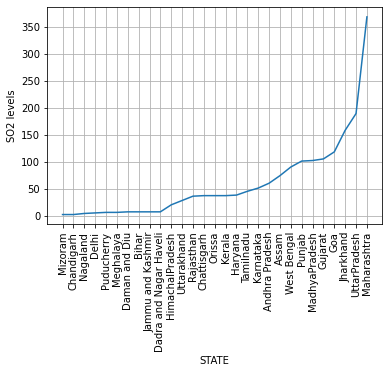

In [122]:
z = b['STATE']
damn = df.groupby('State').sum().sort_values('SO2')['SO2']



plt.plot(z,damn) ## grouping and using the count functionality then.
## for grid for bettter reaibility
plt.xticks(z,rotation='vertical')
plt.ylabel('SO2 levels')
plt.xlabel('STATE')
plt.grid()

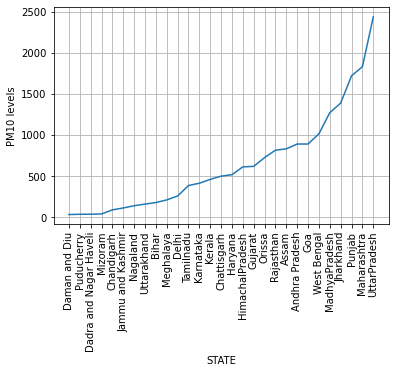

In [123]:
t = c['STATE']
damn = df.groupby('State').sum().sort_values('PM10')['PM10']



plt.plot(t,damn) ## grouping and using the count functionality then.
## for grid for bettter reaibility
plt.xticks(t,rotation='vertical')
plt.ylabel('PM10 levels')
plt.xlabel('STATE')
plt.grid()

# The concepts used above are highly advanced and provide a great uptrend of the three properties.

## Now making a scatter plot between NO2 and SO2 levels, with the scatters/dots providing the labels of STATES.

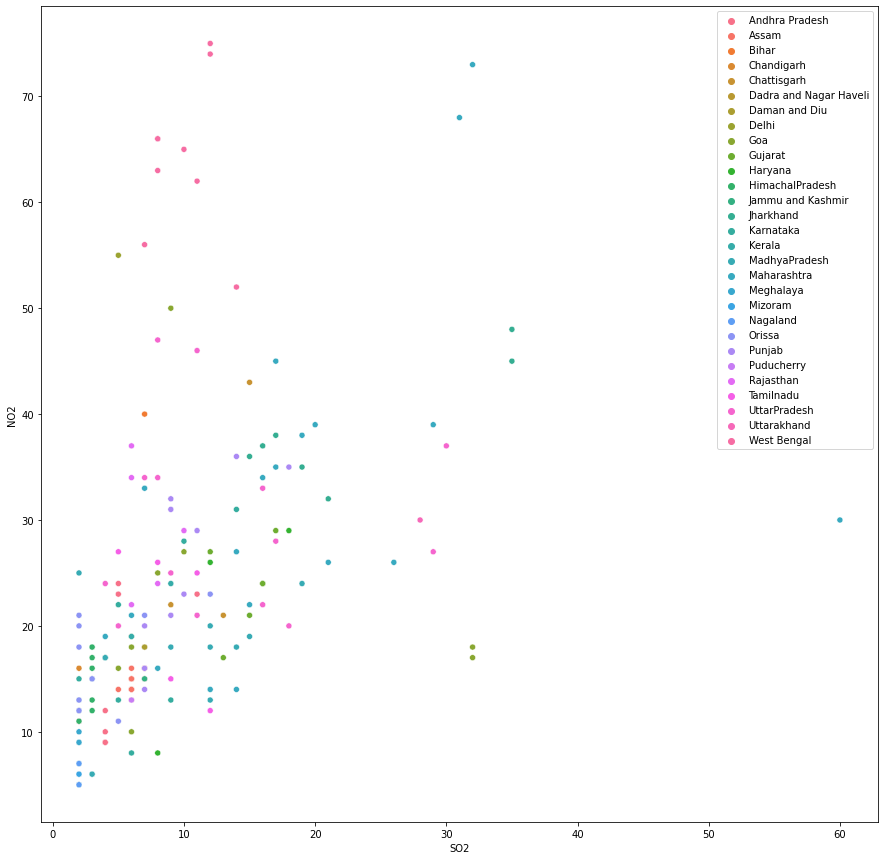

In [131]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df['SO2'],y=df['NO2'],hue=df['State'],data=df)
plt.legend(loc=1)